# Feature Reweighting Matrix

In [33]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # # Load the matrix
# # path = "../../output/cliphba_dynamic_final/things/dynamic_dim_matrix.npy"
# # dim_matrix = np.load(path)

# # # Define true timepoints
# # timepoints = list(range(-100, 1301, 5))

# # # Plot using seaborn heatmap
# # plt.figure(figsize=(10, 5))
# # plt.title("Dynamic Dim Matrix")
# # sns.heatmap(dim_matrix.T, cmap='viridis', cbar=True, xticklabels=timepoints)

# # # Set axis labels
# # plt.xlabel("Time")
# # plt.ylabel("Dimension")

# # # Show every 10th timepoint on the x-axis
# # plt.xticks(ticks=np.arange(0, len(timepoints), 10), labels=timepoints[::10], rotation=45, ha='right')

# # plt.show()


In [34]:
# def sparsemax(z):
#     # Ensure the input is a numpy array of floats
#     z = z.astype(np.float64)
#     # Sort the input in descending order
#     z_sorted = np.sort(z)[::-1]
#     z_cumsum = np.cumsum(z_sorted)
#     k = np.arange(1, len(z)+1)
#     # Calculate the threshold function
#     z_check = z_sorted + (1.0 / k) * (1 - z_cumsum)
#     # Find the valid k indices
#     k_mask = z_check > 0
#     if not np.any(k_mask):
#         # If no valid k, set tau to zero
#         tau = 0.0
#     else:
#         k_max = k[k_mask][-1]
#         tau = (z_cumsum[k_max - 1] - 1) / k_max
#     # Compute the sparsemax activation
#     return np.maximum(z - tau, 0.0)

# # Load the matrix
# path = "../../output/cliphba_dynamic_final/things/weighting_matrix.npy"
# # path = "../weighting_matrix.npy"
# weighting_matrix = np.load(path)

# # Apply sparsemax to each row of the weighting matrix
# # weighting_matrix_sparsemax = np.apply_along_axis(sparsemax, 1, weighting_matrix)

# timepoints = list(range(-100, 1301, 5))
# # Plot using seaborn heatmap
# plt.figure(figsize=(5, 10))
# plt.title("Weighting Matrix after Sparsemax")
# sns.heatmap(weighting_matrix, cmap='viridis', cbar=True, yticklabels=timepoints)
# plt.yticks(ticks=np.arange(0, len(timepoints), 10), labels=timepoints[::10])

# # Show the plot
# plt.show()


<Axes: >

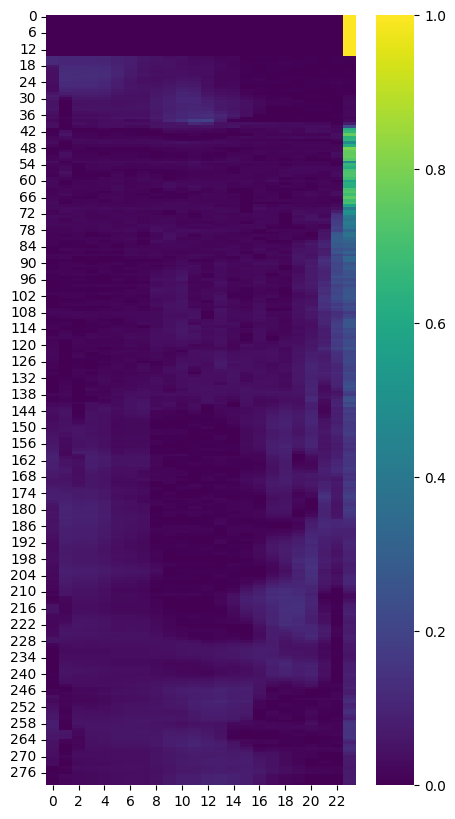

In [35]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pth_path = "../models/cliphba_dynamic_official_v9_step.pth"

# load the matrix within the pth file called weighting_matrix
model = torch.load(pth_path)

weighting_matrix = model['clip_model.weighting_matrix']
weighting_matrix = weighting_matrix.cpu().numpy()
# min max each row and sum to 1
weighting_matrix = (weighting_matrix - weighting_matrix.min(axis=1)[:, None]) / (weighting_matrix.max(axis=1) - weighting_matrix.min(axis=1))[:, None]
weighting_matrix = weighting_matrix / weighting_matrix.sum(axis=1)[:, None]

# plot
timepoints = list(range(-100, 1301, 5))
plt.figure(figsize=(5, 10))
sns.heatmap(weighting_matrix, cmap='viridis', cbar=True)
